In [6]:
#Regularization Parameter:
Lambda = 0.0001

In [7]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.tanhPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.tanhPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [8]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0.0001):        
        #Define Hyperparameters
        self.inputLayerSize = 3
        self.outputLayerSize = 1
        self.hiddenLayerSize = 5
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.tanh(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.tanh(self.z3) 
        return yHat
        
    def tanh(self, z):
        # activation function
        return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    
    def tanhPrime(self,z): 
        #derivative of tanh
        return 1-((np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z)))**2
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.tanhPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.tanhPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [9]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)
            
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X, y)

        #Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
        perturb[p] = 0
            
    #Return Params to original value:
    N.setParams(paramsInitial)

    return numgrad 

In [10]:
NN = Neural_Network(Lambda=0.0001)

In [11]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [12]:
#Should be less than 1e-8:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

2.65372890705424e-09

In [13]:
T = trainer(NN)

In [14]:
T.train(X,y,testX,testY)

         Current function value: 0.014474
         Iterations: 100
         Function evaluations: 108
         Gradient evaluations: 108


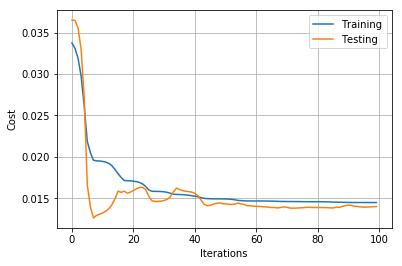

In [15]:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [16]:
T.J

[array([0.03375658]),
 array([0.03310257]),
 array([0.03190146]),
 array([0.02973649]),
 array([0.02613555]),
 array([0.02186002]),
 array([0.02050346]),
 array([0.01958158]),
 array([0.01951302]),
 array([0.01948798]),
 array([0.01944243]),
 array([0.01935803]),
 array([0.0192024]),
 array([0.01892395]),
 array([0.01846937]),
 array([0.01796954]),
 array([0.01750212]),
 array([0.01713541]),
 array([0.01711812]),
 array([0.01709364]),
 array([0.01705654]),
 array([0.01699698]),
 array([0.01689468]),
 array([0.01671637]),
 array([0.0164174]),
 array([0.01599162]),
 array([0.01583294]),
 array([0.01582726]),
 array([0.01581833]),
 array([0.01580125]),
 array([0.01576866]),
 array([0.01570753]),
 array([0.01560009]),
 array([0.01547568]),
 array([0.0154618]),
 array([0.01544229]),
 array([0.01542607]),
 array([0.0153992]),
 array([0.01535579]),
 array([0.01529622]),
 array([0.01524757]),
 array([0.01516953]),
 array([0.01505789]),
 array([0.01497881]),
 array([0.0149497]),
 array([0.01493

In [17]:
T.testJ

[array([0.03649375]),
 array([0.03648333]),
 array([0.03555663]),
 array([0.03294029]),
 array([0.02709876]),
 array([0.01659321]),
 array([0.01396323]),
 array([0.01261688]),
 array([0.0129166]),
 array([0.01305555]),
 array([0.013214]),
 array([0.01342354]),
 array([0.01372963]),
 array([0.01419909]),
 array([0.01490891]),
 array([0.01585358]),
 array([0.01570701]),
 array([0.01584554]),
 array([0.0156035]),
 array([0.015724]),
 array([0.01592879]),
 array([0.01614474]),
 array([0.01629161]),
 array([0.01630228]),
 array([0.01602826]),
 array([0.01524688]),
 array([0.01470318]),
 array([0.01460102]),
 array([0.01460751]),
 array([0.01463908]),
 array([0.014713]),
 array([0.01486497]),
 array([0.01515981]),
 array([0.01577484]),
 array([0.01621759]),
 array([0.01603961]),
 array([0.01591706]),
 array([0.01583203]),
 array([0.01579161]),
 array([0.01572761]),
 array([0.01559014]),
 array([0.01529661]),
 array([0.01477379]),
 array([0.01425905]),
 array([0.01409575]),
 array([0.01413525

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.001306498823786785

In [19]:
yHat=NN.forward(X)

In [20]:
yHat

array([[0.42467004],
       [0.42774882],
       [0.41735628],
       [0.48991369],
       [0.47696711],
       [0.36736376],
       [0.52084496],
       [0.65716912],
       [0.58396283],
       [0.56412272],
       [0.29566932],
       [0.53363218],
       [0.40012651],
       [0.44571761],
       [0.30641735],
       [0.48690742],
       [0.45587056],
       [0.4087729 ],
       [0.28889205],
       [0.52576779],
       [0.50680792],
       [0.49968608],
       [0.57233072],
       [0.36478585],
       [0.59095126],
       [0.54393178],
       [0.66109855],
       [0.55422391],
       [0.51467396],
       [0.48883915],
       [0.59787717],
       [0.6836385 ],
       [0.67632905],
       [0.7033237 ],
       [0.59257445],
       [0.57919738],
       [0.68122112],
       [0.67744088],
       [0.74544412],
       [0.72165655],
       [0.72025053],
       [0.69107821],
       [0.80928086],
       [0.78855294],
       [0.81869003],
       [0.81329885],
       [0.71391571],
       [0.713

In [21]:
y

array([[0.26372911],
       [0.3349176 ],
       [0.52901287],
       [0.46778898],
       [0.58859326],
       [0.28650113],
       [0.47320807],
       [0.45271621],
       [0.38367462],
       [0.23399813],
       [0.35317372],
       [0.14062986],
       [0.26372911],
       [0.33746428],
       [0.28799656],
       [0.50986837],
       [0.50986837],
       [0.        ],
       [0.47639142],
       [0.44976976],
       [0.46613068],
       [0.5882231 ],
       [0.63635825],
       [0.57313552],
       [0.45643258],
       [0.76222627],
       [0.55359126],
       [0.71115948],
       [0.31546218],
       [0.60413983],
       [0.83761975],
       [0.7476273 ],
       [0.84718459],
       [0.85934053],
       [0.78972149],
       [0.74365922],
       [0.68135448],
       [0.89668192],
       [0.73519004],
       [0.98720739],
       [0.50502673],
       [1.        ],
       [0.93787293],
       [0.80331364],
       [0.94438769],
       [0.78782629],
       [0.70467434],
       [0.651

In [22]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y,yHat) 

0.027864580854833915

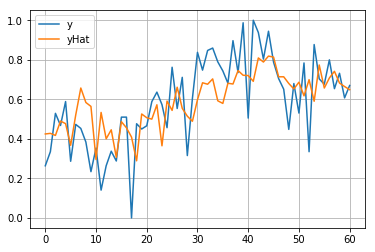

In [23]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [24]:
prediksi=NN.forward(dataprediksi)

In [25]:
prediksi

array([[0.78930627],
       [0.81982262],
       [0.69942478],
       [0.54752758]])

In [26]:
from sklearn.metrics import mean_squared_error 

In [27]:
Y_true= ([	0.67	]	,
[	0.389745184	]	,
[	0.136735812	]	,
[	0.366973156	]	,

)


Y_pred=prediksi
mean_squared_error(Y_true,Y_pred) 

0.13710483967651899

In [28]:
dataprediksi

array([[0.38732394, 0.79538041, 0.67      ],
       [0.37323944, 1.        , 0.67      ],
       [0.36619718, 0.70768171, 0.38974518],
       [0.44366197, 0.49169532, 0.13673581]])

In [ ]:
z=np.array([0.6294	,	0.4578])

In [ ]:
y=np.array([	0.366973156250463	])

In [ ]:
a=np.concatenate((z,y))

In [ ]:
#prediksi 1
prediksi=NN.forward(a)
prediksi

In [ ]:
#prediksi 2
c=prediksi
z1=np.array([0.6795	,	0.4539])
b=y[1:]
d=np.concatenate((z1,b,c))
prediksi=NN.forward(d)
prediksi

In [ ]:
#prediksi 3
c=prediksi
z2=np.array([0.5888	,	0.4545])
b=y[1:]
d=np.concatenate((z2,b,c))
prediksi=NN.forward(d)
prediksi

In [ ]:
#prediksi 4
c=prediksi
z3=np.array([0.527	,	0.4555])
b=y[1:]
d=np.concatenate((z3,b,c))
prediksi=NN.forward(d)
prediksi

In [ ]:
#prediksi 5
c=prediksi
z4=np.array([0.4745	,	0.4564])
b=y[1:]
d=np.concatenate((z4,b,c))
prediksi=NN.forward(d)
prediksi

In [ ]:
#prediksi 6
c=prediksi
z5=np.array([0.4621	,	0.4571])
b=y[1:]
d=np.concatenate((z5,b,c))
prediksi=NN.forward(d)
prediksi